Training data shape: (1437, 64)
Epoch 0000, Loss: 0.180681
Epoch 0200, Loss: 0.067443
Epoch 0400, Loss: 0.058270
Epoch 0600, Loss: 0.043717
Epoch 0800, Loss: 0.034402
Epoch 1000, Loss: 0.031468
Epoch 1200, Loss: 0.028416
Epoch 1400, Loss: 0.025553
Epoch 1600, Loss: 0.022986
Epoch 1800, Loss: 0.020828


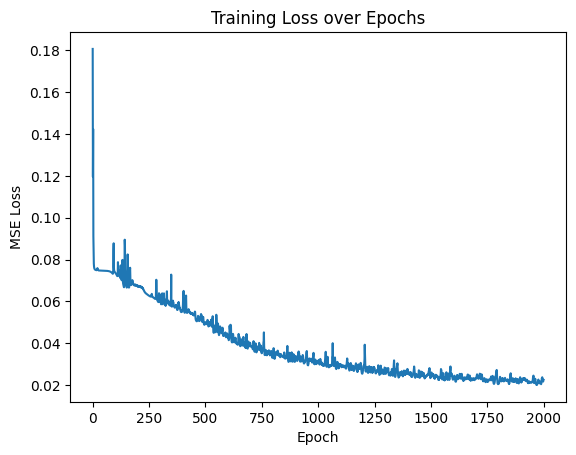

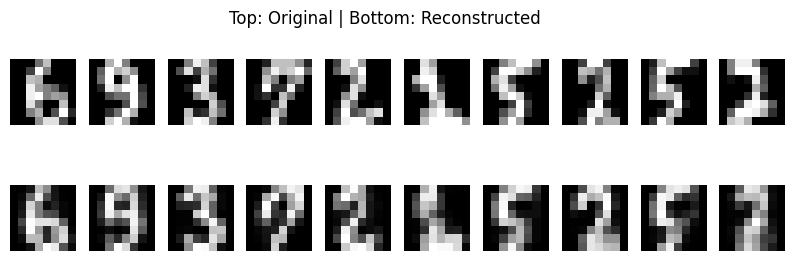

In [6]:
# ==============================================
# Autoencoder from scratch using NumPy
# ==============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ---------- Load and preprocess data ----------
digits = load_digits()
X = digits.data  # shape (1797, 64)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)

# ---------- Initialize network parameters ----------
np.random.seed(0)
n_input, n_hidden1, n_hidden2 = 64, 32, 16
lr = 0.01  # learning rate

W1 = np.random.randn(n_input, n_hidden1) * 0.1
b1 = np.zeros((1, n_hidden1))
W2 = np.random.randn(n_hidden1, n_hidden2) * 0.1
b2 = np.zeros((1, n_hidden2))
W3 = np.random.randn(n_hidden2, n_hidden1) * 0.1
b3 = np.zeros((1, n_hidden1))
W4 = np.random.randn(n_hidden1, n_input) * 0.1
b4 = np.zeros((1, n_input))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)

# ---------- Training loop ----------
epochs = 2000
losses = []

for epoch in range(epochs):
    # Forward pass
    h1 = sigmoid(np.dot(X_train, W1) + b1)
    h2 = sigmoid(np.dot(h1, W2) + b2)  # bottleneck
    h3 = sigmoid(np.dot(h2, W3) + b3)
    output = sigmoid(np.dot(h3, W4) + b4)

    # Compute loss (MSE)
    loss = np.mean((X_train - output) ** 2)
    losses.append(loss)

    # Backpropagation
    d_output = (output - X_train) * sigmoid_deriv(output)
    d_h3 = np.dot(d_output, W4.T) * sigmoid_deriv(h3)
    d_h2 = np.dot(d_h3, W3.T) * sigmoid_deriv(h2)
    d_h1 = np.dot(d_h2, W2.T) * sigmoid_deriv(h1)

    # Update weights
    W4 -= lr * np.dot(h3.T, d_output)
    b4 -= lr * np.sum(d_output, axis=0, keepdims=True)
    W3 -= lr * np.dot(h2.T, d_h3)
    b3 -= lr * np.sum(d_h3, axis=0, keepdims=True)
    W2 -= lr * np.dot(h1.T, d_h2)
    b2 -= lr * np.sum(d_h2, axis=0, keepdims=True)
    W1 -= lr * np.dot(X_train.T, d_h1)
    b1 -= lr * np.sum(d_h1, axis=0, keepdims=True)

    if epoch % 200 == 0:
        print(f"Epoch {epoch:04d}, Loss: {loss:.6f}")

# ---------- Plot loss ----------
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# ---------- Visualize reconstructions ----------
h1 = sigmoid(np.dot(X_test, W1) + b1)
h2 = sigmoid(np.dot(h1, W2) + b2)
h3 = sigmoid(np.dot(h2, W3) + b3)
output = sigmoid(np.dot(h3, W4) + b4)

n = 10
plt.figure(figsize=(10, 3))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(output[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.suptitle("Top: Original | Bottom: Reconstructed")
plt.show()
